<a href='http://www.scienceacademy.ca'> <img style="float: left;height:70px" src="Logo_SA.png"></a>

# Project -- Linear Regression Machine Learning Model
## [Health Insurance Cost Prediction](https://www.kaggle.com/annetxu/health-insurance-cost-predicition/data)

Columns in the dataset are:
* **age:** <br>age of primary beneficiary
* **sex:** <br>insurance contractor gender -- female / male
* **bmi:** <br>Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight $(kg/m^2)$ using the ratio of height to weight, ideally 18.5 to 24.9
* **children:** <br>Number of children covered by health insurance / Number of dependents
* **smoker:** <br>Smoking -- yes / no
* **region:** <br>the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* **charges:** <br>Individual medical costs billed by health insurance


**`'charges'`** column is the **target column** based on all other features in the list.

**First thing first, import the required libraries.**

In [2]:
# We are already familiar with these ones!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Please load the dataset into a pandas dataframe and output the head of the data**

In [8]:
# please code here
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Notice, the smoker column is yes/no, create a new column where you will have 1 for yes and 0 for no** Hint: You need to write a function for this task!

In [9]:
# please code here
df['smoker_norm'] = [1 if c=='yes' else 0 for c in df['smoker']]
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_norm
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


**Could you please write a function that returns 1 if bmi > 30 and 0 for all other bmi values. Use this function to create a new column 'obese' with values 1 and 0.**

In [10]:
# please code here
df['obese'] = [30 if c>30 else 0 for c in df['bmi']]
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_norm,obese
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,30
2,28,male,33.000,3,no,southeast,4449.46200,0,30
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0


**Notice, the sex column is male/female, create a new column where you will have 1 for male and 0 for female.** You need to write a function and then use that to create a new column.

In [11]:
# please code here
df['sex_norm'] = [1 if c=='male' else 0 for c in df['sex']]
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_norm,obese,sex_norm
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,30,1
2,28,male,33.000,3,no,southeast,4449.46200,0,30,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,0,1


**You have couple of new columns in your data, check the head of your dataframe again.**

In [12]:
# please code here
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_norm,obese,sex_norm
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,30,1
2,28,male,33.000,3,no,southeast,4449.46200,0,30,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,0,1


,age,sex,bmi,children,smoker,region,charges,smoker_norm,obese,sex_norm
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,0,1


**How many observations you have in your data, also display the basic statistics of your dataframe**. hint: Use `info()` and `describe()`. 

In [13]:
# please code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   smoker_norm  1338 non-null   int64  
 8   obese        1338 non-null   int64  
 9   sex_norm     1338 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 104.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
age            1338 non-null int64
sex            1338 non-null object
bmi            1338 non-null float64
children       1338 non-null int64
smoker         1338 non-null object
region         1338 non-null object
charges        1338 non-null float64
smoker_norm    1338 non-null int64
obese          1338 non-null int64
sex_norm       1338 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 104.6+ KB


In [14]:
# please code here
df.describe()

,age,bmi,children,charges,smoker_norm,obese,sex_norm
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.204783,15.807175,0.505232
std,14.049960,6.098187,1.205493,12110.011237,0.403694,14.983867,0.500160
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,30.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000,30.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,30.000000,1.000000


,age,bmi,children,charges,smoker_norm,obese,sex_norm
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.204783,0.526906,0.505232
std,14.049960,6.098187,1.205493,12110.011237,0.403694,0.499462,0.500160
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000,1.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000


**Please output the list of columns in your data**

In [15]:
# please code here
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'smoker_norm', 'obese', 'sex_norm'],
      dtype='object')

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'smoker_norm', 'obese', 'sex_norm'],
      dtype='object')

# Exploratory Data Analysis (EDA)

**Recreate the plots below.**<br>
Notice the mean(charges) along y axis in right plot. Hint: you can use seaborn's barplot() method.

<AxesSubplot:xlabel='sex', ylabel='charges'>

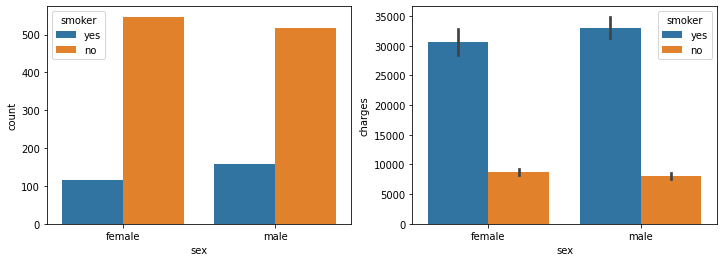

In [17]:
# please code here
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.countplot(x='sex',data=df, hue='smoker', ax = axes[0])
sns.barplot(x='sex', y='charges',data=df, hue='smoker', ax = axes[1])

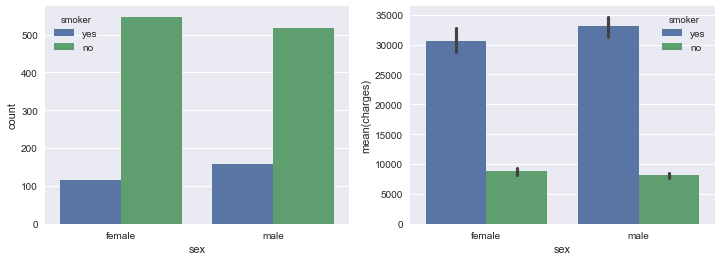

**Please recreate the plots below.**

<AxesSubplot:xlabel='children', ylabel='count'>

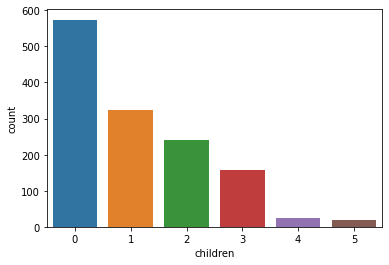

In [18]:
# please code here
sns.countplot(x="children", data=df)

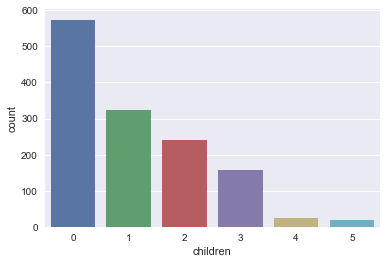

**Please recreate the plot below.**hint : kind = reg

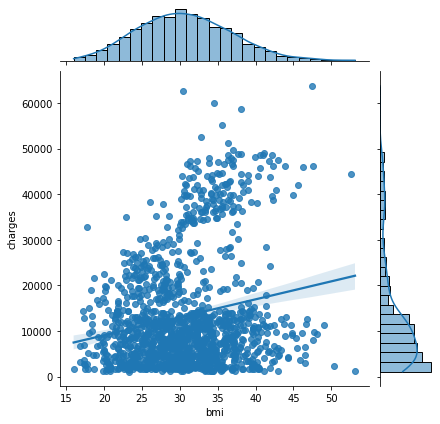

In [19]:
# please code here
sns.jointplot(x='bmi',y='charges',data=df,kind='reg')

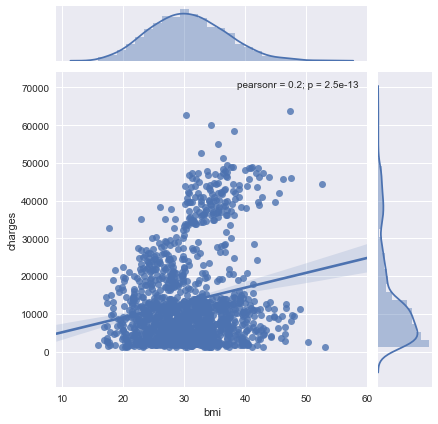

**Recreate the heatmap for correlations**

<AxesSubplot:>

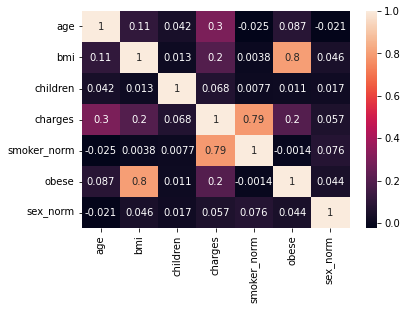

In [23]:
# please code here
sns.heatmap(data=df[['age', 'bmi', 'children', 'charges', 'smoker_norm', 'obese', 'sex_norm']].corr(), annot=True)

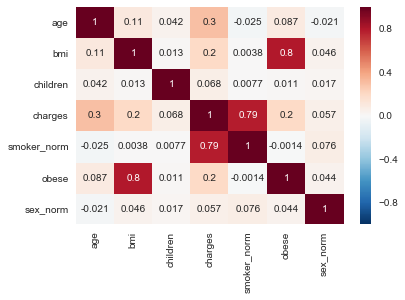

# Linear Regression Model Training
Excited!<br>
Time to create/train our model!<br>

**Separate data into X and y arrays<br>**
Use `['age', 'bmi', 'children','smoker_norm', 'obese']` for X and `['charges']` for y

In [24]:
# please code here
X = df[['age', 'bmi', 'children','smoker_norm', 'obese']]
y = df['charges']

**Import train_test_split and split the data into training and test data sets** use test_size=0.33, random_state=101

In [26]:
# please code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

**Check the head of you X_train** 

In [27]:
# please code here
X_train.head()

,age,bmi,children,smoker_norm,obese
612,18,33.155,0,0,30
65,19,28.900,0,0,0
42,41,21.780,1,0,0
533,37,36.190,0,0,30
586,21,20.235,3,0,0


,age,bmi,children,smoker_norm,obese
612,18,33.155,0,0,1
65,19,28.900,0,0,0
42,41,21.780,1,0,0
533,37,36.190,0,0,1
586,21,20.235,3,0,0


**Import `linear_model`**

In [28]:
# please code here
from sklearn import linear_model

**Create an instance for the LinerRegression model** 

In [29]:
# please code here
lm = linear_model.LinearRegression()

**Train you model on X_train and y_train** 

In [30]:
# please code here
lm.fit(X_train, y_train)

LinearRegression()

/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**What is the value of the intercept?**

In [31]:
# please code here
lm.intercept_

-6569.11752302314

-6569.11752302


**What are the values of the Coefficients?**

In [32]:
# please code here
lm.coef_

array([  241.39461251,    90.26053022,   537.54489467, 23418.33376791,
         138.8887127 ])

array([   241.39461251,     90.26053022,    537.54489467,  23418.33376791,
         4166.66138097])

**Create a dataframe using columns from `X` as `index` and values of the coefficients in a new column `'Coefficient'`. **

In [35]:
# please code here
Coefficient = pd.DataFrame(data=lm.coef_, index=X.columns, columns=['Coefficient'] )
Coefficient

,Coefficient
age,241.394613
bmi,90.260530
children,537.544895
smoker_norm,23418.333768
obese,138.888713


,Coefficient
age,241.394613
bmi,90.260530
children,537.544895
smoker_norm,23418.333768
obese,4166.661381


**Our model have never seen `X_test`, let's provide test data "`X_test`" to our created model and see what the predictions are. Once we get the predictions from the model, we can compare them with what we have in our `y_test`.**

In [36]:
# please code here
prediction = lm.predict(X_test)

**Generate the scatter plot below**

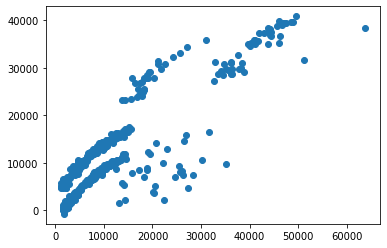

In [39]:
# please code here
plt.scatter(y_test, prediction)

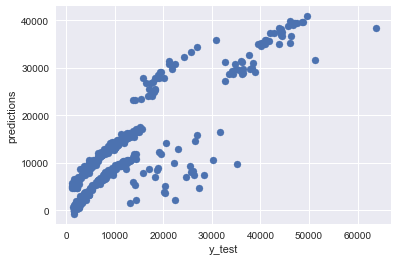

**Recreate the residual Histogram given below** hint: `y_test - predictions` 

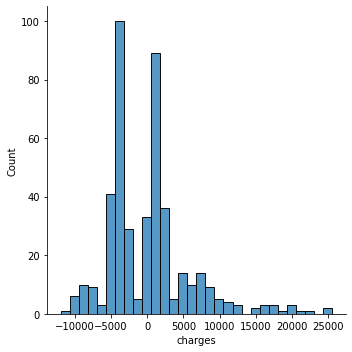

In [45]:
# please code here
sns.displot(y_test - prediction, bins=30, kind='hist')

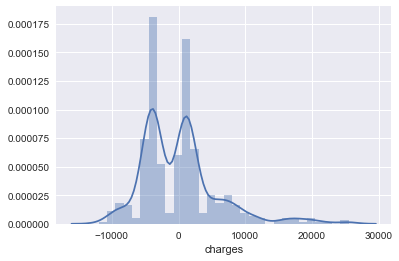

**Print MAE, MSE and RMSE** 

In [50]:
# please code here
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 4244.486518056409
MSE: 33540220.023688886
RMSE: 5791.391890011319


MAE: 4244.48651806
MSE: 33540220.0237
RMSE: 5791.39189001


# Excellent !<br><br><br><br><br><br>
## Additional task:
**Calculate the insurance for the given BMI's**

BMI [categories](https://en.wikipedia.org/wiki/Body_mass_index#Categories) are defined as 

Category ------------------------ BMI (kg/m2)Upper limit
* Normal (healthy weight)-----------------25
* Overweight------------------------------30
* Obese Class I (Moderately obese)--------35
* Obese Class II (Severely obese)---------40
* Obese Class III (Very severely obese)---45
* Obese Class IV (Morbidly Obese)--------50
* Obese Class V (Super Obese)------------60

**only use age, bmi and smoker coefficients in the function**

In [51]:
def calculate_insurance(age,obesity,smoking,inter,cof ):
    age_c = cof[0]
    bmi_c = cof[2]
    smoker_c = cof[4]
    return (age_c*age)+(bmi_c*obesity)+(smoker_c*smoking)+inter

**use age = 50 and the customer is smoker (smoket = 1) for the complete range of BMI.**

In [52]:
bmi = [25,30,35,40,45,50,60]
age = 50
smoker = 1
insurance=[]
for value in bmi:
    print('For BMI',value,'Insurance will be:',
          calculate_insurance(age,value,smoker,lm.intercept_,lm.coef_))

For BMI 25 Insurance will be: 19078.124181907166
For BMI 30 Insurance will be: 21765.848655276575
For BMI 35 Insurance will be: 24453.573128645985
For BMI 40 Insurance will be: 27141.29760201541
For BMI 45 Insurance will be: 29829.02207538482
For BMI 50 Insurance will be: 32516.746548754236
For BMI 60 Insurance will be: 37892.19549549306


## Great Work!